<a href="https://colab.research.google.com/github/kunyoungkim/streamlit-test/blob/main/matplotlib%26seaborn_%EC%8B%AC%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## matplotlib 시각화 이쁘게 만들기

<ipython-input-72-20a32339a291>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mean = tips.groupby('day').total_bill.mean()
<ipython-input-72-20a32339a291>:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(['Tursday', 'Friday', 'Saturday', 'Sunday'], rotation=0, fontsize=12)


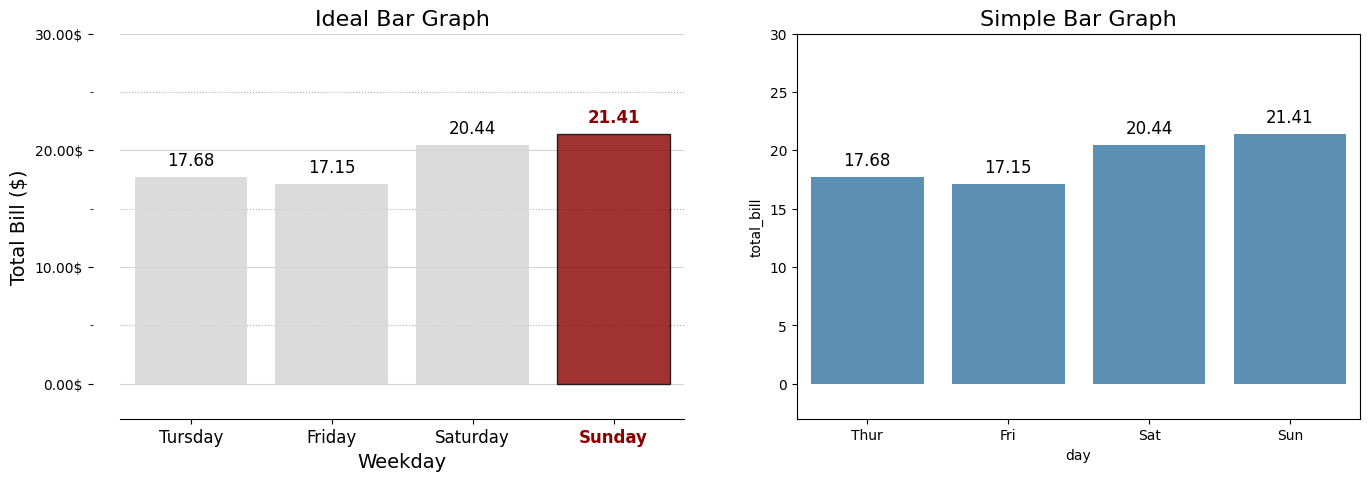

In [72]:
## 1단계 : 라이브러리 및 데이터 불러오기
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np
import pandas as pd

tips = sns.load_dataset("tips")

## 2단계 : 시각화 객체와 서브플롯 설정
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))

## 3단계 : y축 포멧터 정의
def major_formatter(x, pos):
    return "%.2f$" % x
formatter = FuncFormatter(major_formatter)

## 4단계 : 첫번째 그래프 작성 (1) - chart
ax0 = sns.barplot(x="day", y='total_bill', data=tips,
                  errorbar=None, color='lightgray', alpha=0.8, zorder=2,
                  ax=ax[0])

## 5단계 : 첫번째 그래프 작성 (2) - 막대그래프 스타일 및 텍스트 레이블 추가
# 각 요일별 평균 총 요금을 계산하고 가장 높은 요금을 가진 요일 찾기
group_mean = tips.groupby('day').total_bill.mean()
h_day = group_mean.sort_values(ascending=False).index[0]
h_mean = np.round(group_mean.sort_values(ascending=False).values[0], 2)

# 각 막대에 대해 개별적으로 스타일을 적용하고 텍스트 레이블을 추가
for p in ax0.patches: # p는 각각의 개별적인 막대를 의미
    fontweight = 'normal'
    color = "k"
    height = np.round(p.get_height(), 2)
    if h_mean == height:
        fontweight = 'bold'
        color = "darkred"
        p.set_facecolor(color)
        p.set_edgecolor("black")
    ax0.text(p.get_x() + p.get_width() / 2., height + 1, height, ha='center',
             size=12, fontweight=fontweight, color=color)

## 6단계 : 첫번째 그래프 서브플롯 설정 및 그리드 추가
# 서브플롯의 제목, 축 범위, 스파인 가시성을 설정
ax0.set_ylim(-3, 30)
ax0.set_title("Ideal Bar Graph", size=16)
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(("outward", 20))
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)

# y축에 대한 메이저 및 마이너 로케이터와 포맷터를 설정
ax0.yaxis.set_major_locator(MultipleLocator(10))
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(5))

# y축 레이블 설정
ax0.set_ylabel("Total Bill ($)", fontsize=14)

# y축에 그리드를 추가. 메이저 그리드는 일발 선으로, 마이너 그리드는 점섬으로 표시
ax0.grid(axis="y", which="major", color="lightgray")
ax0.grid(axis="y", which="minor", ls=":")

# x축 레이블 및 틱 레이블 설정
ax0.set_xlabel("Weekday", fontsize=14)
for xtick in ax0.get_xticklabels():
  if xtick.get_text() == h_day:
    xtick.set_color("darkred")
    xtick.set_weight("demibold")
  else:
    xtick.set_color("k")
    xtick.set_weight("normal")
ax0.set_xticklabels(['Tursday', 'Friday', 'Saturday', 'Sunday'], rotation=0, fontsize=12)

## 7단계 : 두번쨰 Simple 그래프 작성
ax1 = sns.barplot(x="day", y='total_bill', data=tips,
                  errorbar=None,  alpha=0.8,
                  ax=ax[1])

for p in ax1.patches: # p는 각각의 개별적인 막대를 의미
    height = np.round(p.get_height(), 2)
    ax1.text(p.get_x() + p.get_width() / 2., height + 1, height, ha='center',
             size=12)
ax1.set_ylim(-3, 30)
ax1.set_title("Simple Bar Graph", size=16)

## 8단계 : 전체 그래프 표시
plt.show()